In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import shapely

In [81]:
STATE_URL = "https://raw.githubusercontent.com/dosm-malaysia/data-open/main/datasets/geodata/administrative_1_state.geojson"

In [82]:
plt.rcParams.update({'grid.linestyle': 'dotted',
                     'figure.autolayout': True,
                     'lines.markersize':2.5})

In [83]:
def scatter_state(state_geo, f_geo):
    fig, ax = plt.subplots()
    ax.axis('off')

    state_geo.plot(ax=ax, edgecolor="black", linewidth=1,color="white")
    f_geo.plot(ax=ax, color="red", legend=True, alpha=0.4)
    return fig

In [84]:
state_geo = gpd.read_file(STATE_URL)

In [85]:
from utils.scraper import get_kfc, get_pizza_hut, get_mcd, get_dominos

In [86]:
kfc = get_kfc()[['address', 'gesStoreId','lat', 'locationId','long', 'name', 'state']]
kfc_geo = gpd.GeoDataFrame(kfc, geometry=gpd.points_from_xy(kfc.long, kfc.lat))

In [87]:
len(kfc_geo.name.unique())

734

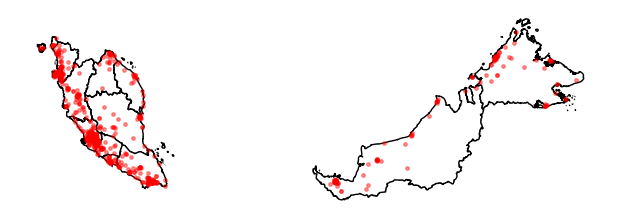

In [88]:
fig = scatter_state(state_geo, kfc_geo)

In [89]:
mcd = get_mcd()[["name", "lat", "lng"]]
mcd_geo = gpd.GeoDataFrame(mcd, geometry=gpd.points_from_xy(mcd.lng, mcd.lat))

In [90]:
len(mcd_geo.name.unique())

333

In [91]:
mcd_geo.query('''name == "McDonald's KK Airport"''')

,name,lat,lng,geometry
102,McDonald's KK Airport,5.923602,110.050620,POINT (110.05062 5.92360)


In [92]:
# correct the KK Airport McD location
mcd_geo.loc[102, "geometry"] = shapely.geometry.Point(116.05087577541953, 5.92294369173068)

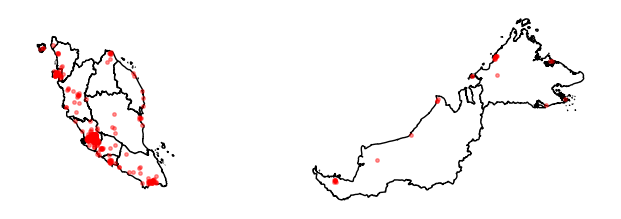

In [93]:
fig = scatter_state(state_geo, mcd_geo)

In [94]:
pizza_hut = get_pizza_hut()[["id", "name", "lat", "long"]]
pizza_hut_geo = gpd.GeoDataFrame(pizza_hut, geometry=gpd.points_from_xy(pizza_hut.long, pizza_hut.lat))

In [95]:
len(pizza_hut_geo.name.unique())

455

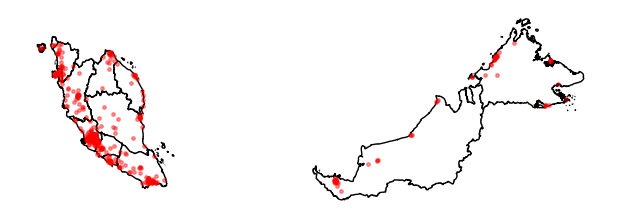

In [96]:
fig = scatter_state(state_geo, pizza_hut_geo)

In [97]:
dominos = get_dominos()[["StoreName", "Latitude", "Longitude"]]
dominos_geo = gpd.GeoDataFrame(dominos, geometry=gpd.points_from_xy(dominos.Longitude, dominos.Latitude))

In [98]:
len(dominos_geo.StoreName.unique())

241

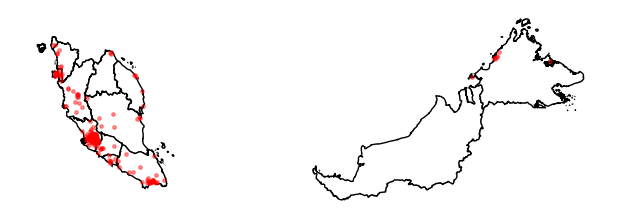

In [99]:
fig = scatter_state(state_geo, dominos_geo)